# MNIST Project

## Imports

In [1]:
import torch
from torch import Tensor 
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.autograd import Variable
import src.dlc_practical_prologue as prologue
import matplotlib.pyplot as plt

import src.MLP as mlp
import src.convnet as cn

import sys
if sys.version_info[0] == 3:
    from importlib import reload

## Loading the Data

In [2]:
N = 1000
# Trainingset: train_X (train_input) & train_Y (train_target)
# Testset: test_X (test_input) & test_Y (test_target)
train_X, train_Y, train_Class, test_X, test_Y, test_Class = prologue.generate_pair_sets(N)

In [3]:
%%capture
mu, std = train_X.mean(), train_X.std()
train_X.sub_(mu).div_(std)
test_X.sub_(mu).div_(std)

# Functions for Training and Testing

In [4]:
def train_model(model, criterion, optimizer, nb_epochs, minibatch_size, train_X, train_Y, verbose=False):
    for e in range(nb_epochs):
        for b in range(0, train_X.size(0), minibatch_size):
            out = model(train_X.narrow(0, b, minibatch_size))
            loss = criterion(out, train_Y.narrow(0, b, minibatch_size))
            model.zero_grad()
            loss.backward()
            optimizer.step()
        if(verbose): print(compute_nb_errors(model, train_X, train_Y, minibatch_size))
    return model

In [5]:
def train_model_path(model, criterion, optimizer, nb_epochs, minibatch_size, train_X, train_Y, test_X, test_Y, verbose=False):
    train_error = []
    test_error = []
    for e in range(nb_epochs):
        for b in range(0, train_X.size(0), minibatch_size):
            out = model(train_X.narrow(0, b, minibatch_size))
            loss = criterion(out, train_Y.narrow(0, b, minibatch_size))
            model.zero_grad()
            loss.backward()
            optimizer.step()
        train_error.append(compute_nb_errors(model, train_X, train_Y, minibatch_size))
        test_error.append(compute_nb_errors(model, test_X, test_Y, minibatch_size))
        if(verbose): print(compute_nb_errors(model, train_X, train_Y, minibatch_size))
    return model, train_error, test_error

In [6]:
def compute_nb_errors(model, data_input, data_target, minibatch_size):
    nb_data_errors = 0
    for b in range(0, data_input.size(0), minibatch_size):
        out = model(data_input.narrow(0, b, minibatch_size))
        # compares the outputted values for the two channels and gives back the argmax (in pred)
        _, pred = torch.max(out.data, 1)
        for k in range(minibatch_size):
            if data_target[b+k] != pred[k]:
                nb_data_errors += 1
    return nb_data_errors

## Model 1: Multi-Layer Perceptron
- To give a baseline performance achieved by most simplest architecture
- Shallow (1 hidden layer) and deep (5 hidden layers) MLP

In [21]:
# flatten the input data as we use a fully-connected neural network.
train_X = train_X.view(train_X.size(0), -1)
test_X = test_X.view(test_X.size(0), -1)

### Part 1: Shallow MLP

In [8]:
class MLP_shallow(nn.Module):
    """Neural Network definition, Multi Layer Perceptron"""
    def __init__(self):
        super(MLP_shallow, self).__init__()
        self.l1 = nn.Linear(392, 470)    
        self.l2 = nn.Linear(470, 2)    
 
    def forward(self, x):
        h1 = F.relu(self.l1(x))
        y = self.l2(h1)
        return y

In [9]:
model0a = MLP_shallow()
model0a, train_path, test_path = train_model_path(model0a, nn.CrossEntropyLoss(), optim.SGD(model0a.parameters(), lr=1e-1), \
                                                 50, 100, train_X, train_Y, test_X, test_Y, verbose=False)

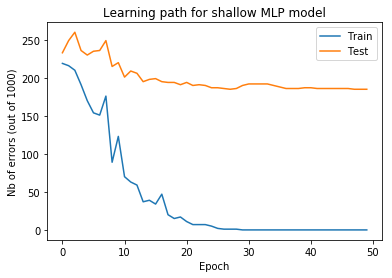

Final Test Error: 185/1000


In [10]:
plt.plot(train_path, label = 'Train')
plt.plot(test_path, label = 'Test')
plt.title('Learning path for shallow MLP model')
plt.xlabel('Epoch')
plt.ylabel('Nb of errors (out of 1000)')
plt.legend()
plt.show()
print('Final Test Error: {}/1000'.format(compute_nb_errors(model0a, test_X, test_Y, 100)))

**Repeating the procedure with the MLP module**

In [9]:
reload(mlp)
train_path, test_path = mlp.eval_MLP(deep=False, verbose=False, print_error=True)

Shallow MLP Model: Final Error: 18.6%


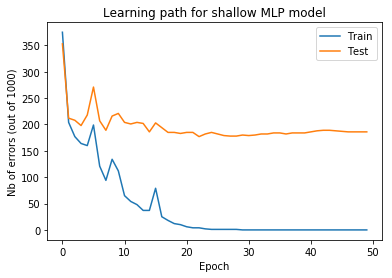

In [10]:
plt.plot(train_path, label = 'Train')
plt.plot(test_path, label = 'Test')
plt.title('Learning path for shallow MLP model')
plt.xlabel('Epoch')
plt.ylabel('Nb of errors (out of 1000)')
plt.legend()
plt.show()

### Part 2: Deep MLP

In [11]:
class MLP_deep(nn.Module):
    """Neural Network definition, Multi Layer Perceptron"""
    def __init__(self):
        super(MLP_deep, self).__init__()
        self.l1 = nn.Linear(392, 470)  
        self.l2 = nn.Linear(470, 564)
        self.l3 = nn.Linear(564, 677)
        self.l4 = nn.Linear(677, 812)
        self.l5 = nn.Linear(812, 2)    
 
    def forward(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        h4 = F.relu(self.l4(h3))
        y = self.l5(h4)
        return y

In [12]:
model0b = MLP_deep()
model0b, train_path, test_path = train_model_path(model0b, nn.CrossEntropyLoss(), optim.SGD(model0b.parameters(), lr=1e-1), \
                                                 50, 100, train_X, train_Y, test_X, test_Y, verbose=False)

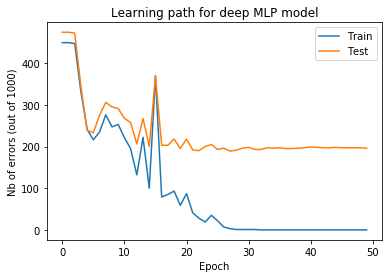

Final Test Error: 196/1000


In [13]:
plt.plot(train_path, label = 'Train')
plt.plot(test_path, label = 'Test')
plt.title('Learning path for deep MLP model')
plt.xlabel('Epoch')
plt.ylabel('Nb of errors (out of 1000)')
plt.legend()
plt.show()
print('Final Test Error: {}/1000'.format(compute_nb_errors(model0b, test_X, test_Y, 100)))

**Repeat with external module**

In [11]:
reload(mlp)
train_path, test_path = mlp.eval_MLP(deep=True, verbose=False, print_error=True)

Deep MLP Model: Final Error: 18.6%


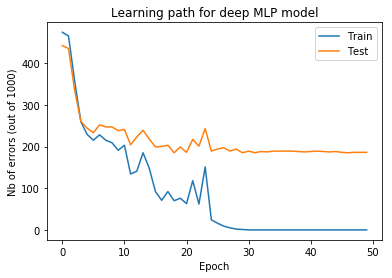

In [12]:
plt.plot(train_path, label = 'Train')
plt.plot(test_path, label = 'Test')
plt.title('Learning path for deep MLP model')
plt.xlabel('Epoch')
plt.ylabel('Nb of errors (out of 1000)')
plt.legend()
plt.show()

It is obvious from the results that shallow and deep MLPs both overfit strongly to the trainingset while explaining the testset insufficiently. 

It would be possible to improve these MLPs by adding dropout or batch normalization (especially for the deep one). But as we do know that these kinds of models are anyways not best adapted to the task of image classification, we do not go further with otimizing these models and also won't implement weight sharing or auxiliary loss in this type of model.

It is hence now clear that a more sophisticated model architecture has to be developed.

## Model 2: Naive convnet
For the second model, we create a naive convnet, not taking into account the structure of the channels. I.e. we directly focus on predicting for each pair if the first digit is lesser or equal to the second without using information about the 9 possible classes of digits.

In [14]:
# make sure the input images are again in their natural form (after flattening for the MLP)
train_X = train_X.view(N,2,14,14)
test_X = test_X.view(N,2,14,14)

In [15]:
class convNet(nn.Module):
    def __init__(self):
        super(convNet, self).__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(256, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.relu(self.fc1(x.view(-1, 256)))
        x = self.fc2(x)
        return x

In [16]:
model1 = convNet()
model1, train_path, test_path = train_model_path(model1, nn.CrossEntropyLoss(), optim.SGD(model1.parameters(), lr=1e-1), \
                                                 50, 100, train_X, train_Y, test_X, test_Y, verbose=False)

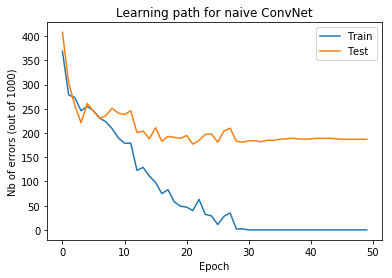

Final Test Error: 187/1000


In [17]:
plt.plot(train_path, label = 'Train')
plt.plot(test_path, label = 'Test')
plt.title('Learning path for naive ConvNet')
plt.xlabel('Epoch')
plt.ylabel('Nb of errors (out of 1000)')
plt.legend()
plt.show()
print('Final Test Error: {}/1000'.format(compute_nb_errors(model1, test_X, test_Y, 100)))

**Use module**

In [7]:
reload(cn)
train_path, test_path = cn.eval_convnet(verbose=False, print_error = True)

Simple ConvNet Model: Final Error: 20.4%


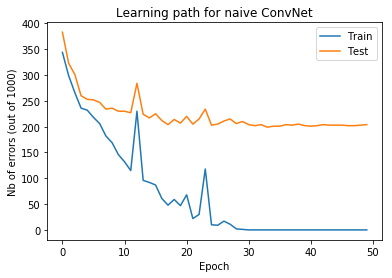

In [8]:
plt.plot(train_path, label = 'Train')
plt.plot(test_path, label = 'Test')
plt.title('Learning path for naive ConvNet')
plt.xlabel('Epoch')
plt.ylabel('Nb of errors (out of 1000)')
plt.legend()
plt.show()

We observe that this model does not manage to learn the mapping very well. It is doing better than the simple MLPs but doesn't use the knowledge of the task (2 images) yet.